In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [82]:
merged_df = pd.read_csv('../../data/life/internet.csv')
merged_df = merged_df.sort_values(by='지역별')
merged_df.head(), merged_df.shape, merged_df['지역별'].unique()

(    지역별    시점  합계출산율  인터넷이용률
 0    강원  2000    1.6     NaN
 328  강원  2019  1.082    84.9
 34   강원  2002  1.317     NaN
 310  강원  2018  1.067    83.7
 292  강원  2017  1.123    83.1,
 (418, 4),
 array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
        '인천', '전남', '전북', '제주', '충남', '충북', '충청'], dtype=object))

In [83]:
# 결측치
# df.isnull().sum()
merged_df = merged_df.dropna()
merged_df.isnull().sum()

지역별       0
시점        0
합계출산율     0
인터넷이용률    0
dtype: int64

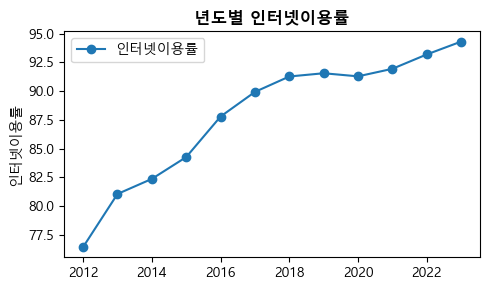

In [84]:
# 년도별 인터넷이용률 시각화
numeric_columns = ['인터넷이용률']

for col in numeric_columns:
    non_numeric = merged_df[col].apply(lambda x: isinstance(x, str))
    if non_numeric.any():
        print(f"Non-numeric values in {col}:")
        print(merged_df[non_numeric][col])

for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df.dropna(subset=numeric_columns, inplace=True)
average_data = merged_df.groupby('시점')[numeric_columns].mean().reset_index()

plt.figure(figsize=(5, 3))
plt.plot(average_data['시점'], average_data['인터넷이용률'], label='인터넷이용률', marker='o')

plt.title('년도별 인터넷이용률', fontweight='bold')
plt.ylabel('인터넷이용률')
plt.legend()

plt.tight_layout()
plt.show()

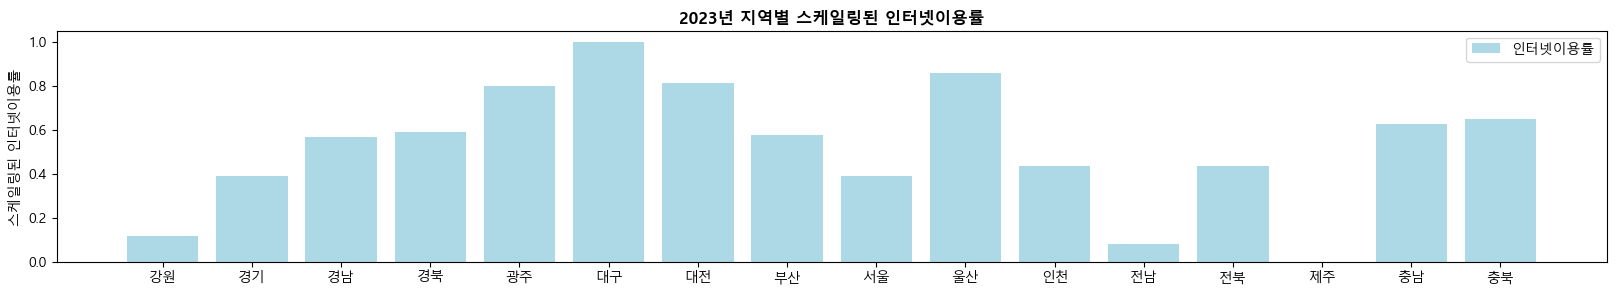

In [85]:
# 지역별 인터넷이용률 시각화
data_2023 = merged_df[merged_df['시점'] == 2023].copy()

scaler = MinMaxScaler()
data_2023.loc[:, ['인터넷이용률']] = scaler.fit_transform(data_2023[['인터넷이용률']])
# print(data_2023[['지역별', '인터넷이용률']])

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(data_2023['지역별'], data_2023['인터넷이용률'], color='lightblue', label='인터넷이용률')
ax1.set_ylabel('스케일링된 인터넷이용률')
ax1.tick_params(axis='y')

plt.title('2023년 지역별 스케일링된 인터넷이용률', fontweight='bold')
ax1.legend(loc='upper right')

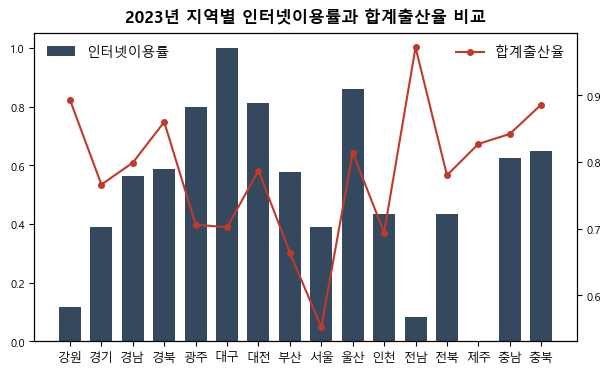

In [86]:
# 지역별 인터넷이용률 vs 합계출산율
data_2023['합계출산율'] = pd.to_numeric(data_2023['합계출산율'], errors='coerce')
fertility_data = data_2023.groupby('지역별')[['합계출산율', '인터넷이용률']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(7, 4))
# fig.patch.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')

bar_width = 0.7
ax1.bar(data_2023['지역별'], data_2023['인터넷이용률'], width=bar_width, color=(52/255, 73/255, 94/255, 1.0), label='인터넷이용률')
ax1.set_title('2023년 지역별 인터넷이용률과 합계출산율 비교', pad=8, fontweight='bold')
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xticks(range(len(data_2023['지역별'])))
ax1.set_xticklabels(data_2023['지역별'], fontsize=9)

ax2 = ax1.twinx()
ax2.plot(fertility_data['지역별'], fertility_data['합계출산율'], color=(192/255, 57/255, 43/255, 1.0), marker='o', markersize=4, label='합계출산율')
ax2.tick_params(axis='y', labelsize=8)

ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

KeyError: '사교육참여율'

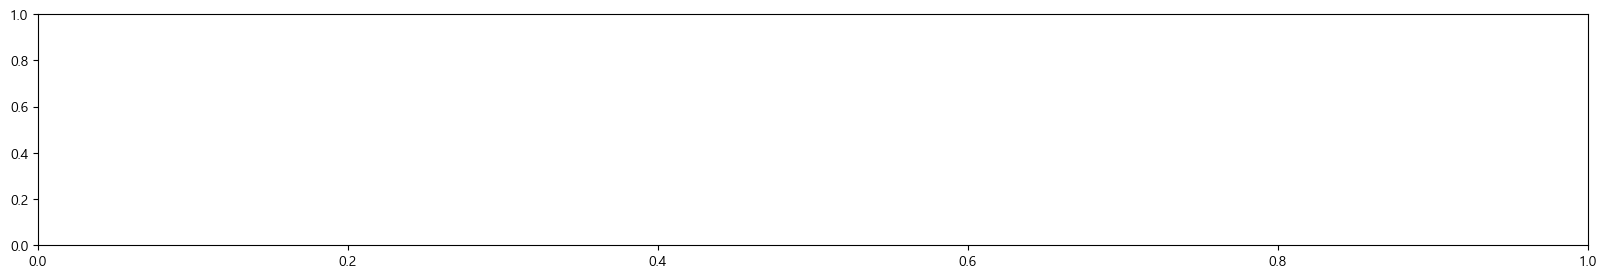

In [87]:
# 지역별 사설학원수 vs 합계출산율
data_2023['합계출산율'] = pd.to_numeric(data_2023['합계출산율'], errors='coerce')
fertility_data = data_2023.groupby('지역별')['합계출산율'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(data_2023['지역별'], data_2023['사교육참여율'], color=(0.2, 0.6, 1.0, 0.6), label='사교육참여율')
ax1.set_ylabel('사교육참여율', fontsize=10)
ax1.set_title('2023년 지역별 사교육참여율와 합계출산율 비교', pad=8, fontweight='bold')
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xticks(range(len(data_2023['지역별'])))
ax1.set_xticklabels(data_2023['지역별'], fontsize=9)

ax2 = ax1.twinx()
ax2.plot(fertility_data['지역별'], fertility_data['합계출산율'], color=(1.0, 0.2, 0.2, 0.6), marker='o', label='합계출산율')
ax2.set_ylabel('합계출산율', fontsize=10)
ax2.tick_params(axis='y', labelsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')